In [ ]:
# Hamiltonian Eigenvalues

In [4]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

$V(x) = -V_0 e^{-\alpha x^2}$

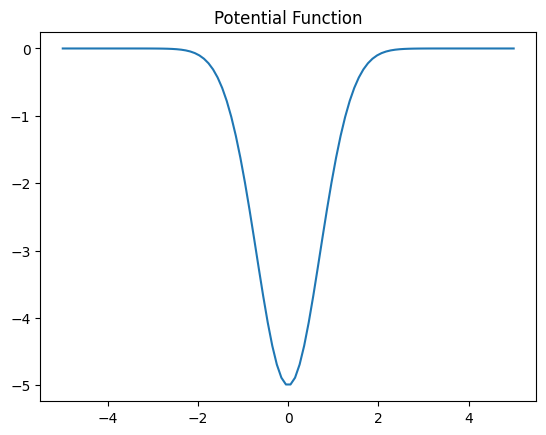

In [5]:
# declarations
n = 100
L = 5
V_0 = -5
alpha = 1
x = np.linspace(-L, L, n)
dx = (2*L)/n
V = np.zeros(n)
h = np.zeros((n, n))

# functions
def potential(x):
    return V_0*(np.e**(-alpha*(x**2)))

# plot potential
for i in range(0, n):
    V[i] = potential(x[i])

plt.plot(x, V)
plt.title("Potential Function")
plt.show()

Lowest 5 Eigenvalues:
[-3.597582036404873, -1.2511981892605217, -0.00286625192872413, 0.29449969885352084, 0.5878413846866425]


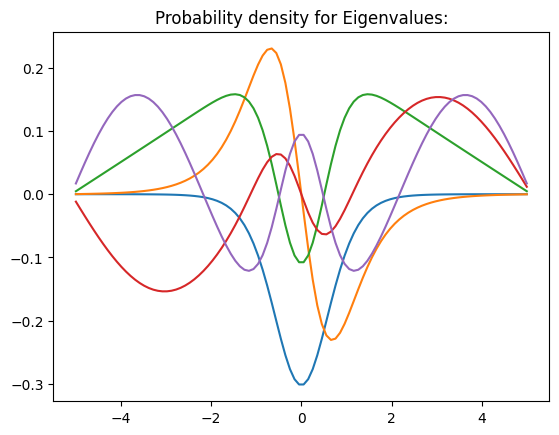

In [6]:
# generate matrix
for i in range(0, n):
    #h[i][i] = (1/(2*(dx**2)))+V[i]
    h[i][i] = (1/(dx**2))+V[i]
    if i != n-1:
        h[i][i+1] = -1/(2*(dx**2))
    if i != 0:
        h[i][i-1] = -1/(2*(dx**2))

# find eigenvalues and eigenvectors
h_eig = np.linalg.eig(h)

# sort eigenvalues and transpose the eigenvectors
h_eig_sorted = sorted(h_eig[0])
psi = np.transpose(h_eig[1])

# display some results
print("Lowest 5 Eigenvalues:")
print(h_eig_sorted[0:5])

plt.title("Probability density for Eigenvalues:")
n_mesh = np.linspace(-L, L, n)
for i in range(5):
    plt.plot(n_mesh, psi[i])
plt.show()

#print("First 3 Eigenvectors:")
#print(h_eig[1][0:3])

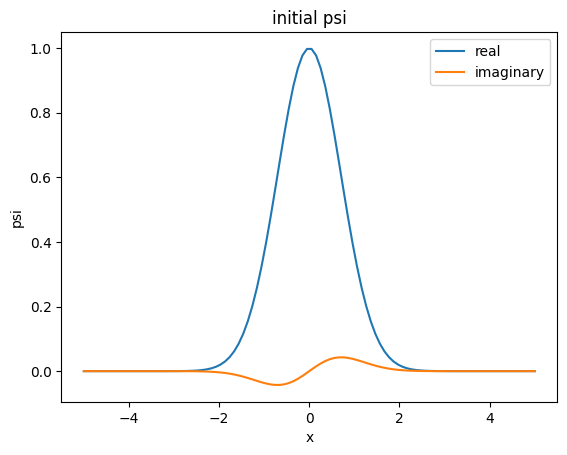

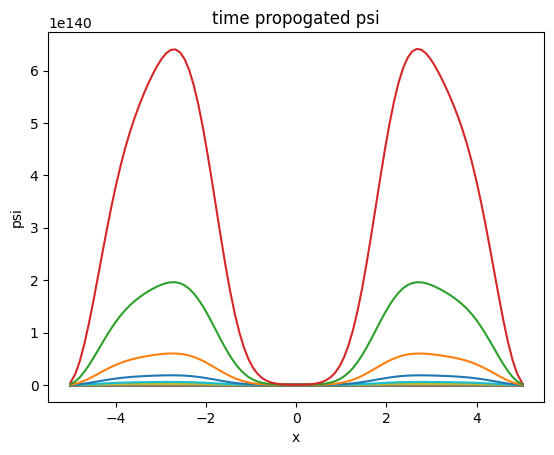

In [29]:
# inital setup

n_x = 100

alpha = 1
k = 0.1
x_0 = 0

x = np.linspace(-5, 5, n_x)
psi = np.empty([n_x, 1]).astype(complex)

for i in range(0, n_x):
    psi[i] = np.exp(-alpha * (x[i] - x_0)**2 + 1j * k * x[i])

plt.plot(x, psi.real, label="real")
plt.plot(x, psi.imag, label="imaginary")
plt.legend()
plt.title("initial psi")
plt.xlabel("x")
plt.ylabel("psi")
plt.show()

# time propogation

dt = 0.001
n_t = 10000

for j in range(0, n_t):
    psi = psi + np.dot((-1j*h*dt), psi)

    if (j % 30 == 0):
        #plt.plot(x, psi.real, label=("real t="+str((j*dt))))
        #plt.plot(x, psi.imag, label=("imag t="+str((j*dt))))
        plt.plot(x, (psi.real**2) + (psi.imag**2), label=("real t="+str((j*dt))))

#plt.legend()
plt.title("time propogated psi")
plt.xlabel("x")
plt.ylabel("psi")
plt.show()

C:\Users\tillm\AppData\Local\Temp\ipykernel_8412\1468197796.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob_psi[i] = (psi[i].real + psi[i].imag) * (psi[i].real - psi[i].imag)


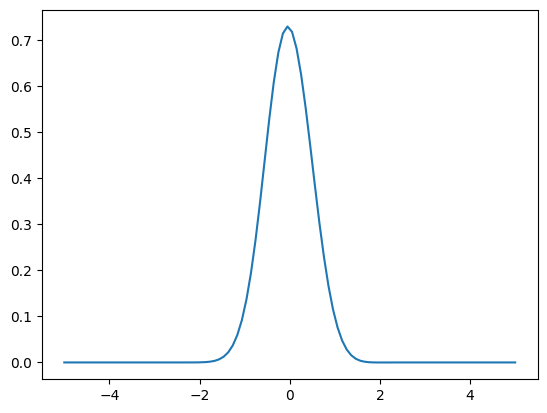

In [21]:
prob_psi = np.zeros(n_x)

for i in range(0, n_x):
    prob_psi[i] = (psi[i].real + psi[i].imag) * (psi[i].real - psi[i].imag)

plt.plot(x, prob_psi)